Import necessary libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ImageDataGenerator to download and preprocess Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = "Cars Dataset/train"
test_dir = "Cars Dataset/test"

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Standardlization for the pixels
    rotation_range=10,
    horizontal_flip=True,
    validation_split=0.2  # Scale for validation
)
test_datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    rescale=1./255  # Standardlization for the pixels
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Size input image
    batch_size=32,
    class_mode='categorical',  
    subset='training'  #trainning 
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical',  # Phân loại nhiều lớp
    subset='validation'  # Dữ liệu validation
)

# Tạo generator cho dữ liệu kiểm tra
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Kích thước ảnh đầu vào
    batch_size=32,
    class_mode='categorical'  # Phân loại nhiều lớp
)

Found 2684 images belonging to 7 classes.
Found 668 images belonging to 7 classes.
Found 822 images belonging to 7 classes.


In [5]:
train_generator[0]

(array([[[[9.80392218e-01, 8.58823597e-01, 6.43137276e-01],
          [9.80392218e-01, 8.58823597e-01, 6.46979690e-01],
          [9.84234631e-01, 8.58823597e-01, 6.58586144e-01],
          ...,
          [6.19845390e-01, 6.70825779e-01, 7.33650029e-01],
          [6.19607866e-01, 6.70588255e-01, 7.33333349e-01],
          [6.15765452e-01, 6.66745901e-01, 7.29490995e-01]],
 
         [[9.80392218e-01, 8.58823597e-01, 6.43137276e-01],
          [9.80392218e-01, 8.58823597e-01, 6.46904588e-01],
          [9.84235883e-01, 8.58823597e-01, 6.58588350e-01],
          ...,
          [6.23610198e-01, 6.74590588e-01, 7.37413585e-01],
          [6.19684219e-01, 6.70664608e-01, 7.33409703e-01],
          [6.15764201e-01, 6.66744590e-01, 7.29489744e-01]],
 
         [[9.80392218e-01, 8.58823597e-01, 6.43137276e-01],
          [9.80392218e-01, 8.58823597e-01, 6.43137276e-01],
          [9.84237134e-01, 8.58898759e-01, 6.58366561e-01],
          ...,
          [6.27527714e-01, 6.78508103e-01, 7.4125

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [7]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.40),
    Dense(32, activation='relu'),  
    Dense(7, activation='softmax')  # Số lớp tương ứng với số nhãn (hãng xe)
])


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,
    epochs=20,
    validation_data=validation_generator
         )

Epoch 1/20


C:\Users\x\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.2059 - loss: 2.1737 - val_accuracy: 0.2530 - val_loss: 1.8741
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - accuracy: 0.2570 - loss: 1.8481 - val_accuracy: 0.3488 - val_loss: 1.7631
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.3520 - loss: 1.7596 - val_accuracy: 0.4266 - val_loss: 1.6076
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.3866 - loss: 1.6444 - val_accuracy: 0.4401 - val_loss: 1.5269
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.4310 - loss: 1.5409 - val_accuracy: 0.5120 - val_loss: 1.4116
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.4776 - loss: 1.4197 - val_accuracy: 0.5060 - val_loss: 1.3999
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.4934 - loss: 1.3861 - val_accuracy: 0.5838 - val_loss: 1.2385
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.5664 - loss: 1.2258 - val_accuracy: 0.576

In [10]:
test_loss, test_acc = model.evaluate(test_generator)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6938 - loss: 1.0588


In [11]:
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test loss: 0.994682788848877
Test accuracy: 0.6958637237548828


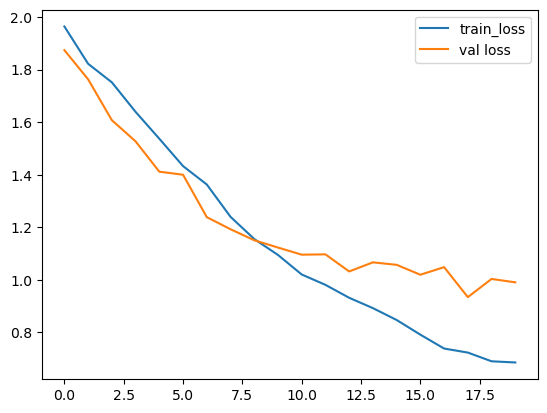

In [12]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

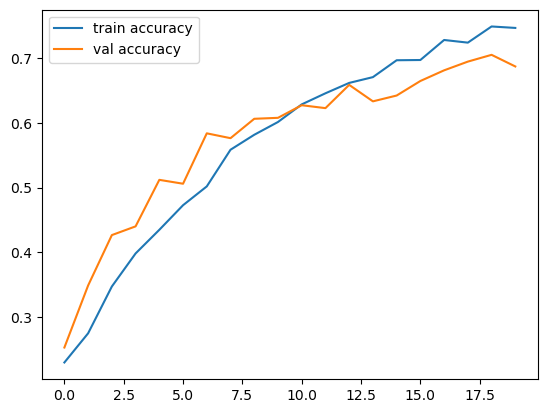

In [13]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

(32, 128, 128, 3)
(32, 7)


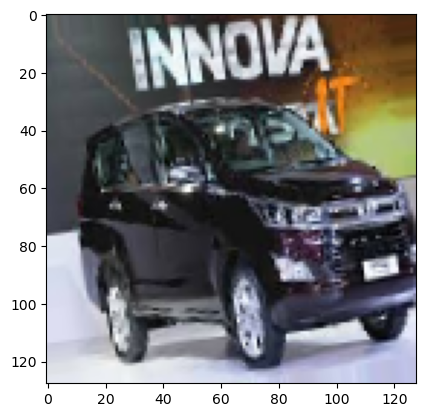

In [14]:
images, labels = test_generator[0]

# Kiểm tra kích thước
print(images.shape)  # Batch gồm 32 ảnh có kích thước 150x150x3
print(labels.shape)  # Batch gồm 32 nhãn, tương ứng với 7 lớp

# Hiển thị ảnh đầu tiên trong batch
plt.imshow(images[0])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


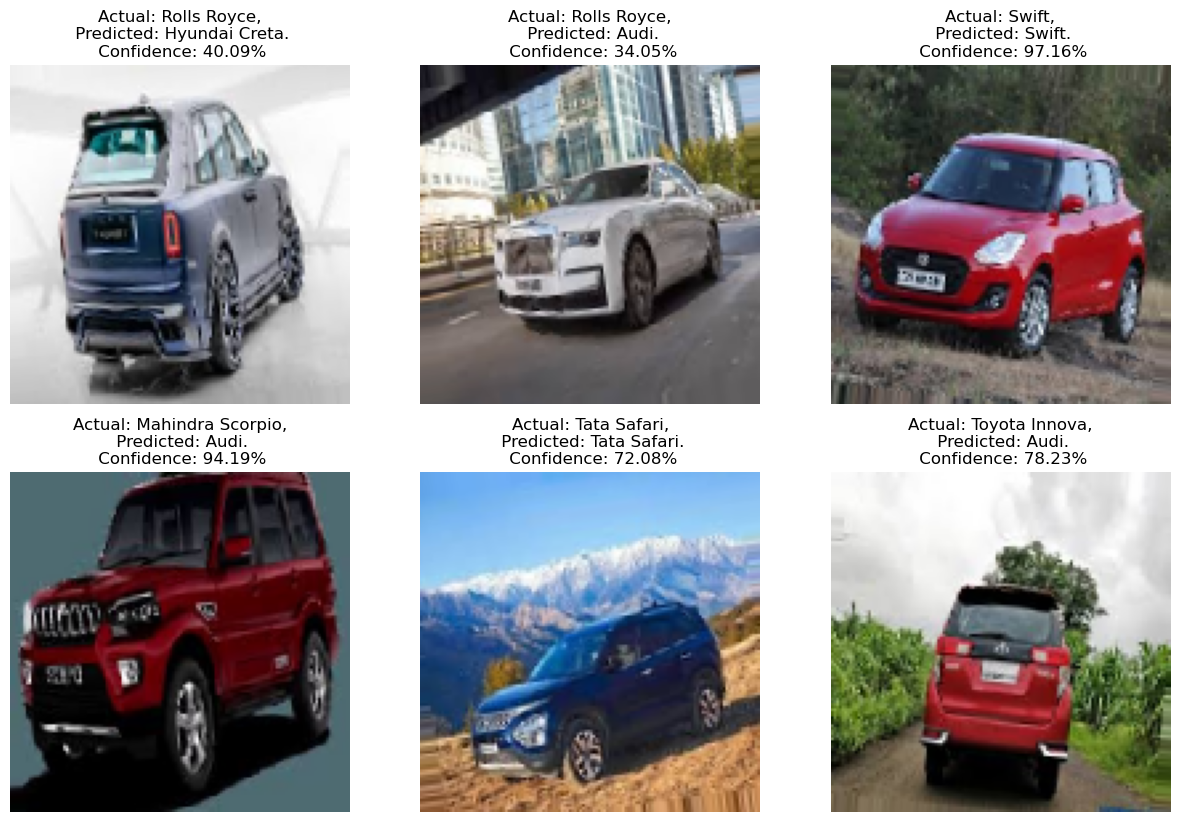

In [16]:
plt.figure(figsize=(15, 15))
class_names = list(train_generator.class_indices.keys())
class_names
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    #Ảnh đang ở 3 chiều , sử dụng expand để thêm một 
    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(np.argmax(labels[i]))]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
plt.imshow(images[2])
plt.show()
class_names = list(train_generator.class_indices.keys())
class_names

    
for images, labels in test_generator:
    
    print(predict(model, images[2]))
    actual_class = class_names[int(np.argmax(labels[2]))]
    print("Actual: ",actual_class)
    break;

In [18]:
#Now we train with transfer learning MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [19]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128 , 3))

In [20]:
base_model.trainable = False

In [21]:
# Thêm các lớp phía trên (các lớp fully connected)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Thêm dropout để giảm overfitting
predictions = Dense(7, activation='softmax')(x)  # Số lớp tương ứng với số nhãn


In [22]:
# Tạo mô hình hoàn chỉnh
model_tran = Model(inputs=base_model.input, outputs=predictions)

# Compile mô hình
model_tran.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_tran = model_tran.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.3774 - loss: 1.8082 - val_accuracy: 0.6826 - val_loss: 0.9692
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.6210 - loss: 1.0503 - val_accuracy: 0.7575 - val_loss: 0.7773
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.7063 - loss: 0.8409 - val_accuracy: 0.7710 - val_loss: 0.7177
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 179ms/step - accuracy: 0.7342 - loss: 0.7380 - val_accuracy: 0.7769 - val_loss: 0.6606
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - accuracy: 0.7754 - loss: 0.6554 - val_accuracy: 0.8219 - val_loss: 0.5946
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.7929 - loss: 0.5640 - val_accuracy: 0.8099 - val_loss: 0.5840
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.8163 - loss: 0.5445 - val_accuracy: 0.8084 - val_loss: 0.5967
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.8102 - loss: 0.5301 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


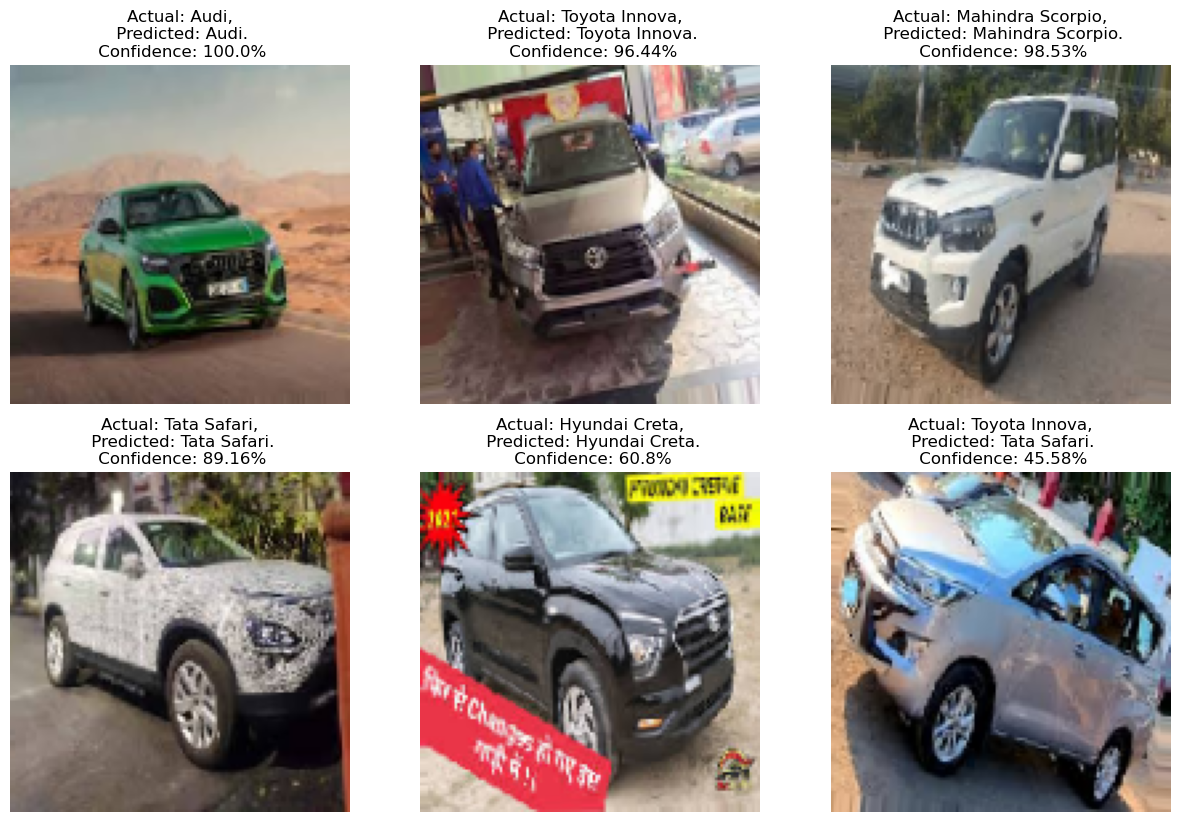

In [34]:
plt.figure(figsize=(15, 15))
class_names = list(train_generator.class_indices.keys())
class_names
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_tran, images[i])
        actual_class = class_names[int(np.argmax(labels[i]))]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

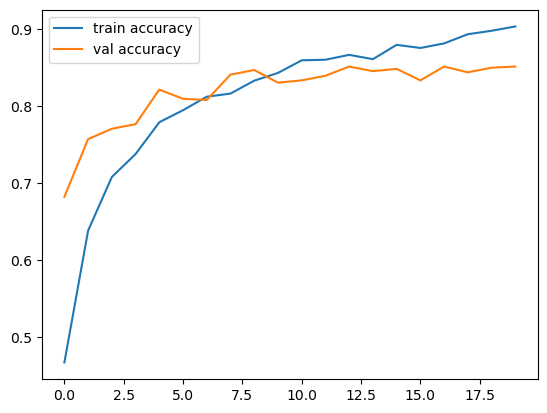

In [35]:
plt.plot(history_tran.history['accuracy'], label = 'train accuracy')
plt.plot(history_tran.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

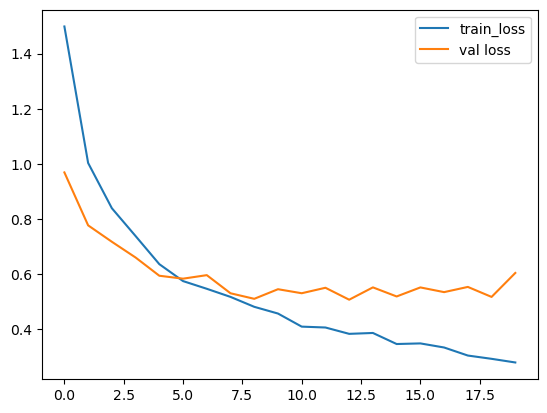

In [24]:
plt.plot(history_tran.history['loss'], label = 'train_loss')
plt.plot(history_tran.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

In [25]:
test_loss, test_acc = model_tran.evaluate(test_generator)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.8492 - loss: 0.5191


In [26]:
#Now we try with VGG16 
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [27]:
base_model_vg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model_vg.layers:
    layer.trainable = False


In [28]:
model_vg = Sequential([
    base_model_vg,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')  # 7 lớp đầu ra cho bài toán phân loại 8 hãng xe
])


In [29]:
model_vg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history_vg = model_vg.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 59s 694ms/step - accuracy: 0.2721 - loss: 2.1053 - val_accuracy: 0.5075 - val_loss: 1.3746
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 63s 742ms/step - accuracy: 0.4881 - loss: 1.3925 - val_accuracy: 0.6168 - val_loss: 1.1919
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 63s 739ms/step - accuracy: 0.5608 - loss: 1.2267 - val_accuracy: 0.6602 - val_loss: 1.0126
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 63s 740ms/step - accuracy: 0.6372 - loss: 1.0023 - val_accuracy: 0.6841 - val_loss: 0.9061
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 63s 743ms/step - accuracy: 0.6732 - loss: 0.9019 - val_accuracy: 0.7290 - val_loss: 0.8514
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 62s 729ms/step - accuracy: 0.7068 - loss: 0.8400 - val_accuracy: 0.7485 - val_loss: 0.8136
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 64s 754ms/step - accuracy: 0.7149 - loss: 0.7901 - val_accuracy: 0.7395 - val_loss: 0.8187
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 64s 758ms/step - accuracy: 0.7256 - loss: 0.7426 - val_accu

In [31]:
test_loss, test_acc = model_vg.evaluate(test_generator)

26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 539ms/step - accuracy: 0.8329 - loss: 0.5504


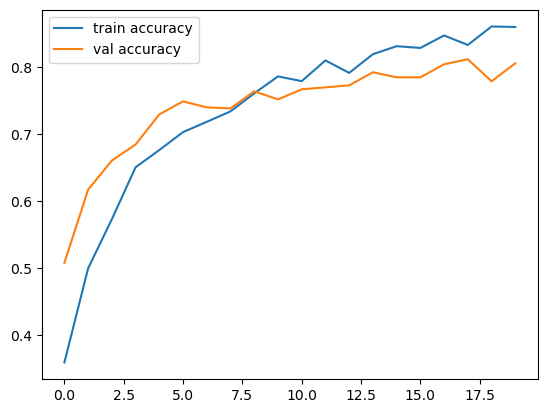

In [36]:
plt.plot(history_vg.history['accuracy'], label = 'train accuracy')
plt.plot(history_vg.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

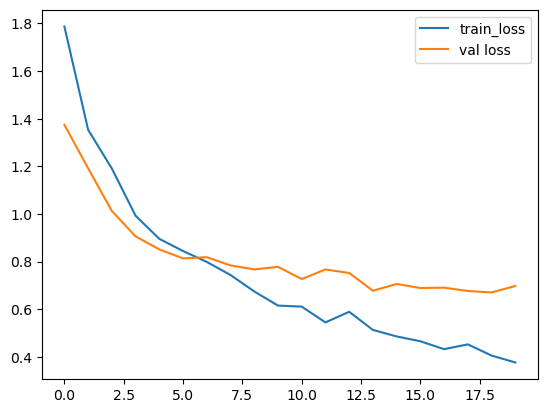

In [32]:
plt.plot(history_vg.history['loss'], label = 'train_loss')
plt.plot(history_vg.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


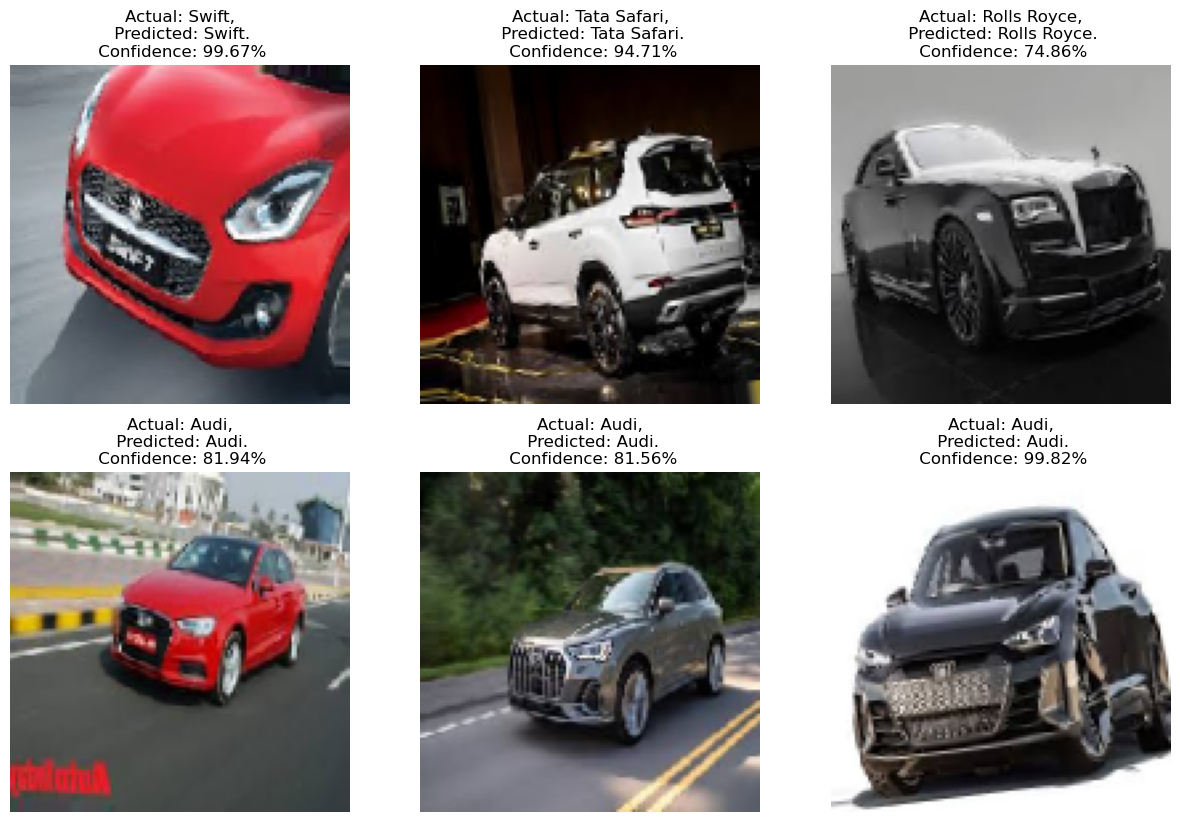

In [33]:
plt.figure(figsize=(15, 15))
class_names = list(train_generator.class_indices.keys())
class_names
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_vg, images[i])
        actual_class = class_names[int(np.argmax(labels[i]))]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break